In [2]:
                                   #LINEAR REGRESSION
#Q1:Estimating Property Valuations: Problem Statement: Estimating Property Valuations Project Description: Build a regression model
#to estimate the valuations of properties based on factors such as location, size, amenities, and recent property sales data. 
#Domain: Real Estate Dataset Link:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Delhi house data.csv")

In [3]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [4]:
df.shape

(1259, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [6]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [7]:
df.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [8]:
a=df.dropna()
a

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [9]:
df.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [10]:
a.drop(['Furnishing','Status','Transaction'],axis=1,inplace=True)

C:\Users\Hi\AppData\Local\Temp\ipykernel_936\357806172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.drop(['Furnishing','Status','Transaction'],axis=1,inplace=True)


In [11]:
a

,Area,BHK,Bathroom,Locality,Parking,Price,Type,Per_Sqft
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Apartment,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Apartment,6667.0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,Builder_Floor,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Builder_Floor,6667.0
5,1300.0,4,3.0,Rohini Sector 24,1.0,15500000,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Chittaranjan Park,3.0,55000000,Builder_Floor,12916.0
1255,1050.0,3,2.0,Chittaranjan Park,3.0,12500000,Builder_Floor,12916.0
1256,875.0,3,3.0,Chittaranjan Park,3.0,17500000,Builder_Floor,12916.0
1257,990.0,2,2.0,Chittaranjan Park Block A,1.0,11500000,Builder_Floor,12916.0


In [12]:
a.tail()

,Area,BHK,Bathroom,Locality,Parking,Price,Type,Per_Sqft
1254,4118.0,4,5.0,Chittaranjan Park,3.0,55000000,Builder_Floor,12916.0
1255,1050.0,3,2.0,Chittaranjan Park,3.0,12500000,Builder_Floor,12916.0
1256,875.0,3,3.0,Chittaranjan Park,3.0,17500000,Builder_Floor,12916.0
1257,990.0,2,2.0,Chittaranjan Park Block A,1.0,11500000,Builder_Floor,12916.0
1258,11050.0,3,3.0,Chittaranjan Park,1.0,18500000,Builder_Floor,12916.0


In [13]:
a.columns

Index(['Area', 'BHK', 'Bathroom', 'Locality', 'Parking', 'Price', 'Type',
       'Per_Sqft'],
      dtype='object')

In [14]:
a.shape

(1005, 8)

In [15]:
a.head()

,Area,BHK,Bathroom,Locality,Parking,Price,Type,Per_Sqft
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Apartment,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Apartment,6667.0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,Builder_Floor,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Builder_Floor,6667.0
5,1300.0,4,3.0,Rohini Sector 24,1.0,15500000,Builder_Floor,6667.0


Text(0.5, 1.0, 'which type house having high price')

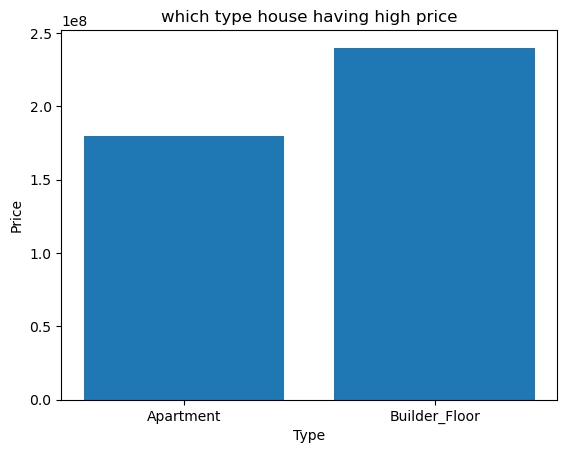

In [16]:
plt.bar(a["Type"],a["Price"])
plt.xlabel("Type")
plt.ylabel("Price")
plt.title("which type house having high price")

<Axes: xlabel='Type', ylabel='count'>

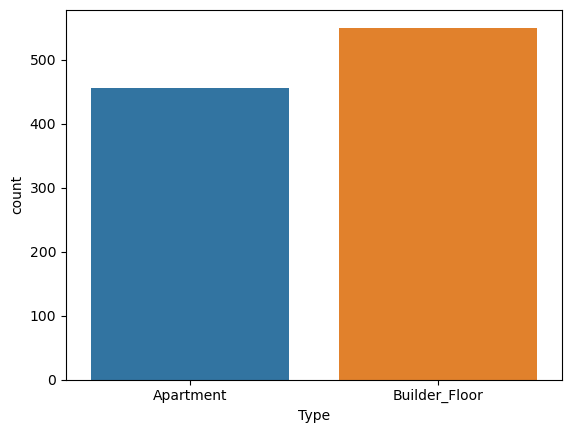

In [17]:
sns.countplot(data=a,x="Type")

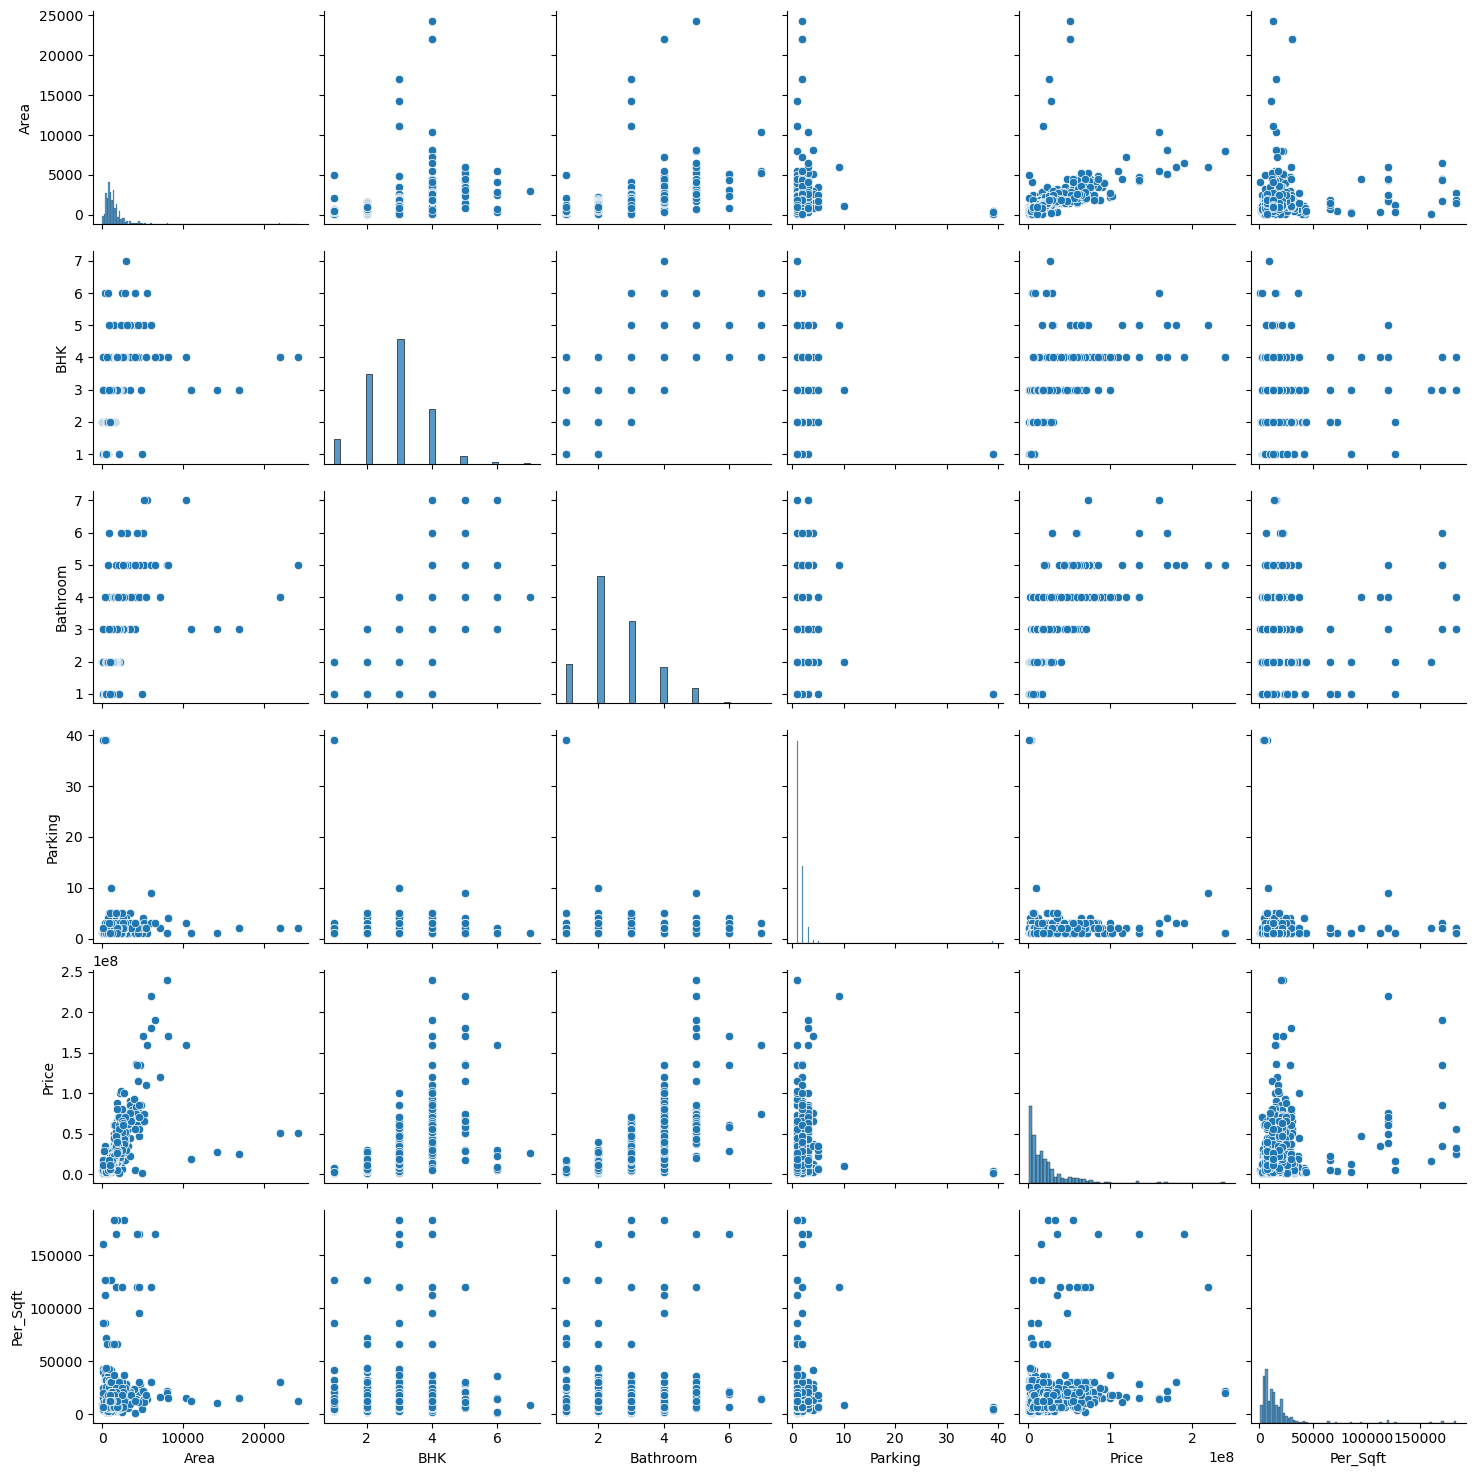

In [18]:
sns.pairplot(a)

Text(0, 0.5, 'Price')

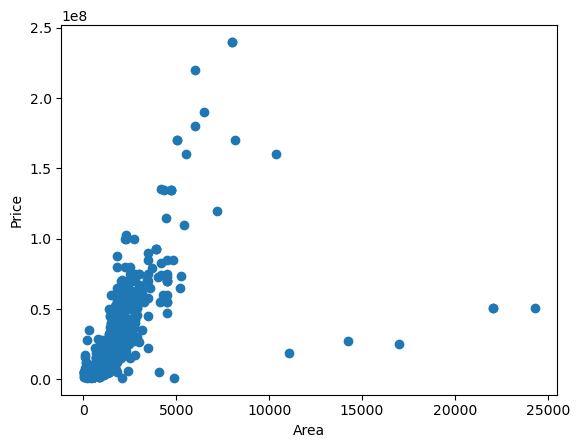

In [19]:
plt.scatter(a["Area"], a["Price"])
plt.xlabel("Area")
plt.ylabel("Price")

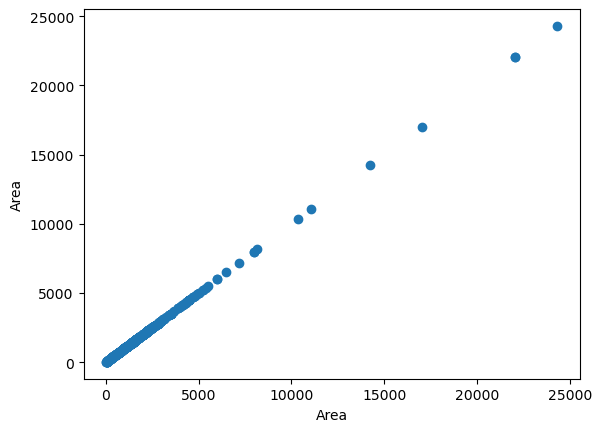

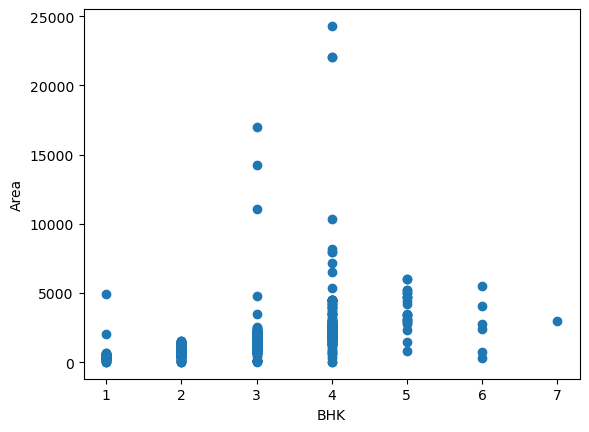

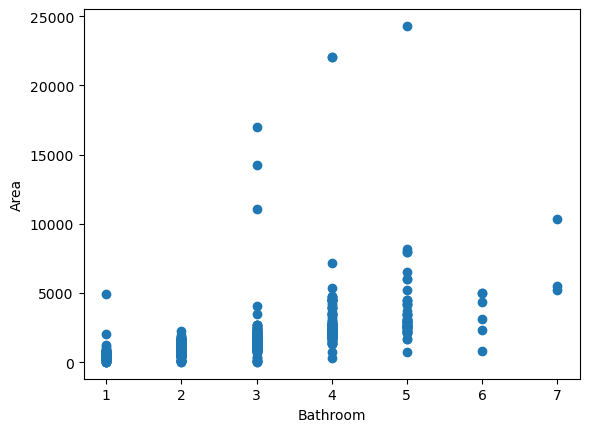

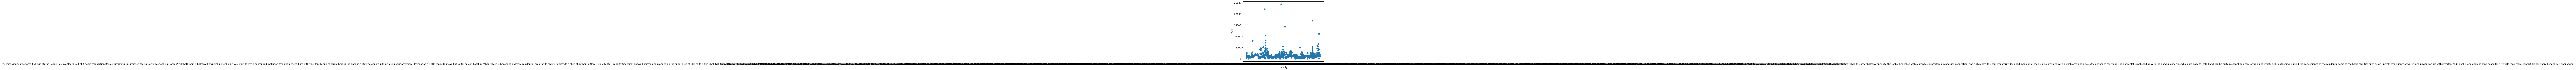

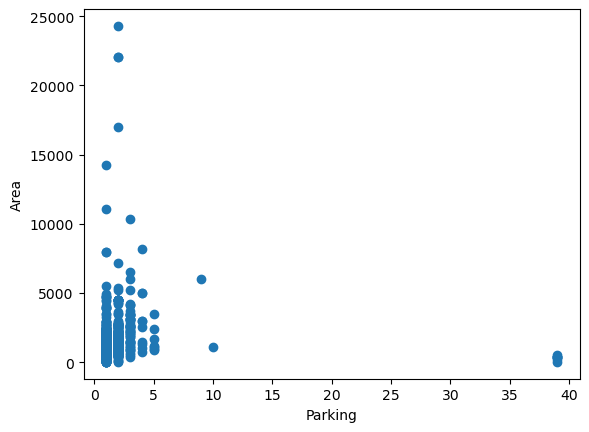

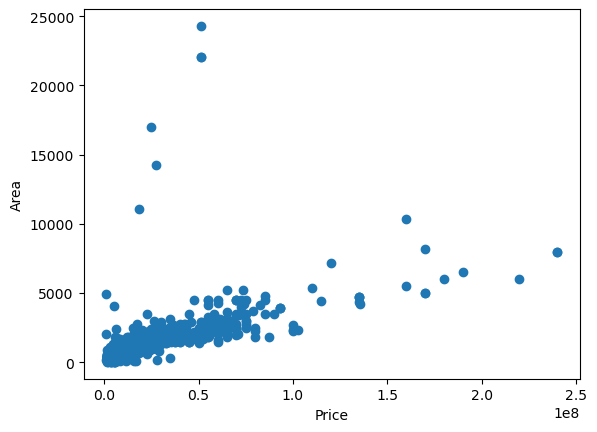

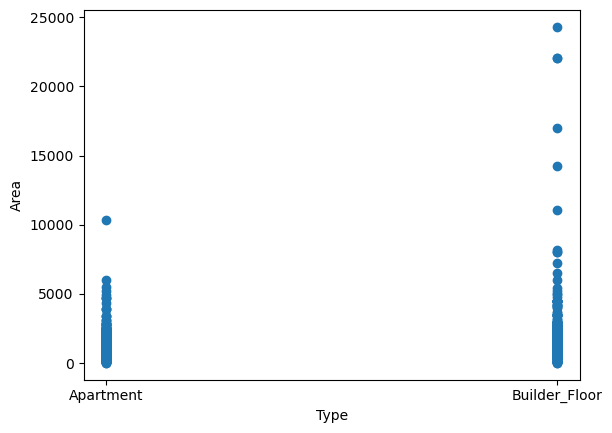

In [20]:
for i in a.columns[:-1]:
    plt.xlabel(i)
    plt.ylabel("Area")
    plt.scatter(a[i],a["Area"])
    plt.show()

In [21]:
x = np.array(a["Area"]).reshape(-1,1)
y = np.array(a["Price"]).reshape(-1,1)

In [67]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [23]:
linear = LinearRegression()

In [24]:
linear.fit(x,y)

LinearRegression()

In [25]:
linear.predict([[34]])

array([[8702119.55010427]])

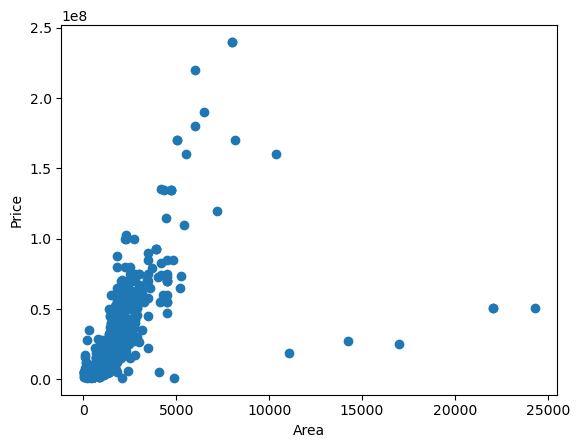

In [26]:
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(x,y)

In [27]:
#SPLITTING THE data

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8)

In [29]:
xtrain

array([[  588.    ],
       [ 1300.    ],
       [ 2500.    ],
       [  900.    ],
       [ 1295.    ],
       [  900.    ],
       [ 1600.    ],
       [  594.    ],
       [ 1700.    ],
       [ 1050.    ],
       [  270.    ],
       [ 1000.    ],
       [  765.    ],
       [  945.    ],
       [ 3405.    ],
       [  630.    ],
       [ 1800.    ],
       [ 1200.    ],
       [ 2600.    ],
       [  440.    ],
       [  800.    ],
       [  750.    ],
       [   50.    ],
       [  810.    ],
       [  700.    ],
       [  450.    ],
       [  760.    ],
       [  173.    ],
       [  550.    ],
       [ 1300.    ],
       [ 1100.    ],
       [ 2000.    ],
       [ 1200.    ],
       [ 1000.    ],
       [ 2430.    ],
       [  445.    ],
       [ 1000.    ],
       [ 2650.    ],
       [ 1500.    ],
       [ 3000.    ],
       [ 3050.    ],
       [  666.    ],
       [ 1350.    ],
       [  210.    ],
       [ 1600.    ],
       [ 1400.    ],
       [ 1150.    ],
       [   28

In [30]:
xtrain = np.array(a["Area"]).reshape(-1,1)
ytrain = np.array(a["Price"]).reshape(-1,1)

In [31]:
xtest = np.array(a["Area"]).reshape(-1,1)
ytest = np.array(a["Price"]).reshape(-1,1)

In [32]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1005, 1), (1005, 1), (1005, 1), (1005, 1))

In [33]:
c=linear.intercept_
c

array([8389055.91106152])

In [34]:
m=linear.coef_
m

array([[9207.75408949]])

In [35]:
ypred_train=m*xtrain+c
ypred_train.flatten()

array([1.52948715e+07, 1.71364223e+07, 1.39137084e+07, ...,
       1.64458407e+07, 1.75047325e+07, 1.10134739e+08])

In [36]:
ypred_train1=linear.predict(xtrain)
ypred_train1

array([[1.52948715e+07],
       [1.71364223e+07],
       [1.39137084e+07],
       ...,
       [1.64458407e+07],
       [1.75047325e+07],
       [1.10134739e+08]])

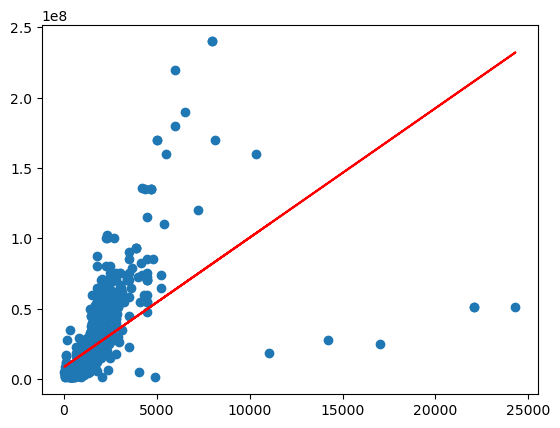

In [37]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,ypred_train1,color="red")


In [38]:
ypred_test1=linear.predict(xtest)
ypred_test1

array([[1.52948715e+07],
       [1.71364223e+07],
       [1.39137084e+07],
       ...,
       [1.64458407e+07],
       [1.75047325e+07],
       [1.10134739e+08]])

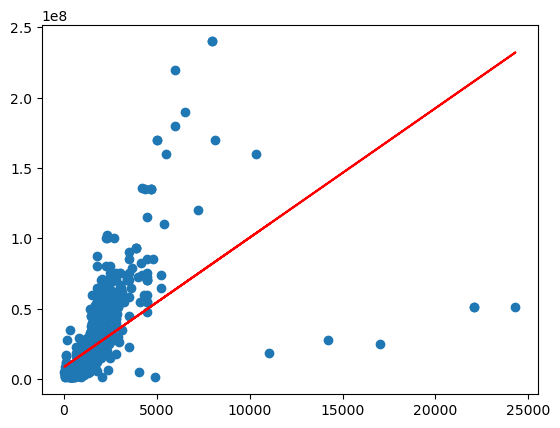

In [39]:
plt.scatter(xtest,ytest)
plt.plot(xtest,ypred_test1,color="red")


In [40]:
ypred = linear.predict(xtest)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [42]:
mean_absolute_error(ytest, ypred)

12967177.29301803

In [43]:
mean_squared_error(ytest, ypred)

514260745108360.75

In [44]:
linear.score(xtrain,ytrain) #r2 score

0.3299466541821301

In [45]:
#multiple linear regression


In [46]:
a.columns

Index(['Area', 'BHK', 'Bathroom', 'Locality', 'Parking', 'Price', 'Type',
       'Per_Sqft'],
      dtype='object')

In [47]:
d=a.drop(columns='Locality')

In [48]:
d

,Area,BHK,Bathroom,Parking,Price,Type,Per_Sqft
1,750.0,2,2.0,1.0,5000000,Apartment,6667.0
2,950.0,2,2.0,1.0,15500000,Apartment,6667.0
3,600.0,2,2.0,1.0,4200000,Builder_Floor,6667.0
4,650.0,2,2.0,1.0,6200000,Builder_Floor,6667.0
5,1300.0,4,3.0,1.0,15500000,Builder_Floor,6667.0
...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,3.0,55000000,Builder_Floor,12916.0
1255,1050.0,3,2.0,3.0,12500000,Builder_Floor,12916.0
1256,875.0,3,3.0,3.0,17500000,Builder_Floor,12916.0
1257,990.0,2,2.0,1.0,11500000,Builder_Floor,12916.0


In [49]:
q=d.drop(columns='Type')

In [50]:
q

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
1,750.0,2,2.0,1.0,5000000,6667.0
2,950.0,2,2.0,1.0,15500000,6667.0
3,600.0,2,2.0,1.0,4200000,6667.0
4,650.0,2,2.0,1.0,6200000,6667.0
5,1300.0,4,3.0,1.0,15500000,6667.0
...,...,...,...,...,...,...
1254,4118.0,4,5.0,3.0,55000000,12916.0
1255,1050.0,3,2.0,3.0,12500000,12916.0
1256,875.0,3,3.0,3.0,17500000,12916.0
1257,990.0,2,2.0,1.0,11500000,12916.0


In [51]:
X=q.drop(columns='Price')

In [52]:
X

,Area,BHK,Bathroom,Parking,Per_Sqft
1,750.0,2,2.0,1.0,6667.0
2,950.0,2,2.0,1.0,6667.0
3,600.0,2,2.0,1.0,6667.0
4,650.0,2,2.0,1.0,6667.0
5,1300.0,4,3.0,1.0,6667.0
...,...,...,...,...,...
1254,4118.0,4,5.0,3.0,12916.0
1255,1050.0,3,2.0,3.0,12916.0
1256,875.0,3,3.0,3.0,12916.0
1257,990.0,2,2.0,1.0,12916.0


In [53]:
Y=q['Price']

In [54]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,train_size=0.8)

In [55]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [56]:
lr.fit(Xtrain,Ytrain)

LinearRegression()

In [57]:
m=lr.coef_
m

array([ 3.09163359e+03, -2.71392038e+05,  1.50601962e+07,  4.15654935e+05,
        1.83918898e+02])

In [58]:
c=lr.intercept_
c

-24344426.683860227

In [59]:
Ypred_train=lr.predict(Xtrain)

In [60]:
Ypred_train

array([ 1.13122565e+07,  8.65063650e+06,  8.57403643e+06, -7.14290365e+06,
        2.91213068e+07,  9.51475112e+06,  6.70267462e+07,  3.26502406e+07,
        1.11853529e+07,  9.16781644e+06,  8.24729909e+06,  2.54115596e+07,
        2.94355689e+07,  4.57392405e+07,  9.60930638e+06,  2.94023245e+07,
        2.77387976e+07,  5.16133443e+07,  3.05861932e+07, -7.34290431e+06,
        6.88058556e+07,  1.17562415e+07,  1.09543714e+07,  4.87313437e+07,
        2.37538515e+07,  1.10477311e+08,  1.51793289e+07,  9.27178995e+06,
       -7.09811683e+06,  2.46147366e+07,  4.62468666e+07,  7.62518959e+07,
        2.98461251e+07,  8.72861811e+06,  5.16715340e+07,  3.19427901e+07,
       -6.06945023e+06,  7.77079138e+07,  1.12614594e+07,  2.54140579e+07,
        1.22761098e+07,  2.84332485e+07,  2.69628867e+07,  2.78955815e+07,
       -6.87405912e+06, -7.07430190e+06,  3.04815915e+07,  1.11214012e+07,
        1.12332617e+07,  8.97182684e+06,  2.80988956e+07, -6.64533508e+06,
        5.85383126e+07,  

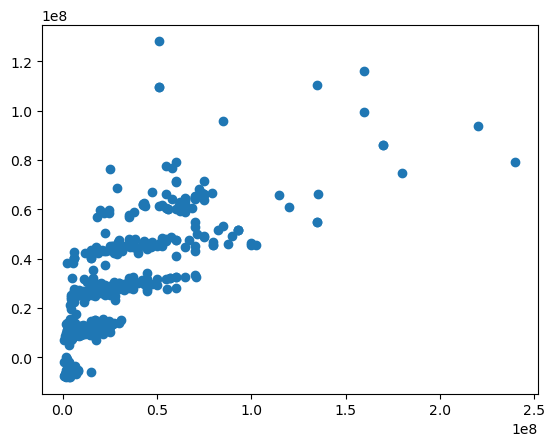

In [61]:
plt.scatter(Ytrain,Ypred_train)


In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(Ytrain,Ypred_train)

0.61047889776473

In [64]:
Ypred_test=lr.predict(Xtest)
Ypred_test

array([ 8.56991448e+06,  7.84557053e+06,  5.47449435e+07,  2.89558678e+07,
        4.17486788e+07, -4.44031133e+06,  9.59300646e+06,  2.65192552e+07,
        8.88255392e+06,  1.28443032e+07,  2.63512170e+07,  1.53202194e+07,
        9.21974521e+06,  3.08628201e+07,  1.50016058e+07,  4.30574241e+07,
        5.06526473e+07, -6.78741069e+06,  1.05503244e+07, -6.83532798e+06,
        9.98549192e+06,  4.39224914e+07, -7.11200096e+06,  2.47650192e+07,
        5.38818786e+07,  1.13424578e+07,  2.75351773e+07, -7.85265524e+06,
       -2.62772695e+06,  5.38818786e+07, -6.49339190e+06,  1.17223411e+07,
        2.97874507e+07,  9.18439055e+06,  2.88968019e+07,  2.86431116e+07,
        2.62436305e+07,  8.91284707e+06,  2.84547718e+07,  1.26011538e+07,
        1.33584098e+07,  1.26794525e+07,  4.73000506e+07,  1.26917647e+07,
        2.68879839e+07,  8.49605482e+06,  9.17387252e+06,  1.09565007e+07,
        1.09857563e+07,  8.41486109e+06,  2.67271627e+07, -6.82306438e+06,
        6.30680321e+07,  

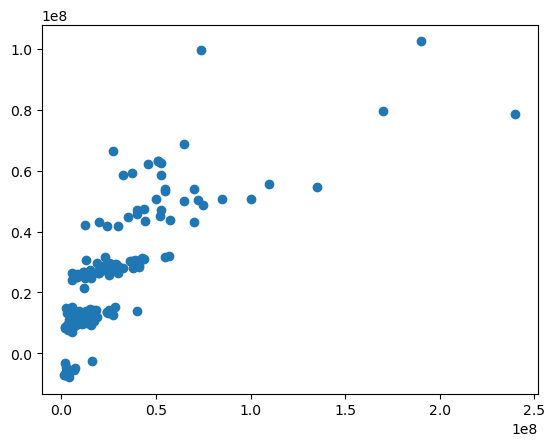

In [65]:
plt.scatter(Ytest,Ypred_test)

In [66]:
r2_score(Ytest,Ypred_test)

0.594741108066255

In [68]:
lasso=Lasso().fit(Xtrain,Ytrain)

In [70]:
ridge=Ridge().fit(Xtrain,Ytrain)

In [72]:
lasso.score(Xtrain,Ytrain)

0.6104788977647155

In [73]:
ridge.score(Xtrain,Ytrain)

0.6104775386369972